In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Файл {filename} успешно загружен. Размер файла: {len(uploaded[filename])} байт.')

Saving data_aptamers.xlsx to data_aptamers.xlsx
Файл data_aptamers.xlsx успешно загружен. Размер файла: 56978 байт.


In [8]:
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Файл {filename} успешно загружен. Размер файла: {len(uploaded[filename])} байт.')

Saving Aptamer_vs_DNA_Final.csv to Aptamer_vs_DNA_Final.csv
Файл Aptamer_vs_DNA_Final.csv успешно загружен. Размер файла: 712736 байт.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df = pd.read_excel('data_aptamers.xlsx')



df.head()

,aptamer_sequence,RNA/DNA,aptamer_length,molecular_target_name,molecular_target_smiles,Kd_value,pH,buffer_conditions
0,ATTTAAGCATGAAATTTGCA,NaN,NaN,L-Tyrosinamide,C1=CC(=CC=C1CC(C(=O)N)N)O,45,7.5,"20 mM Tris, 300 mM NaCl, 5 mM MgCl2"
1,ATTTAAGCATXAAATTFGCA,NaN,NaN,cocaine,CN1C2CCC1C(C(C2)OC(=O)C3=CC=CC=C3)C(=O)OC,10,7.5,"20 mM Tris, 300 mM NaCl, 5 mM MgCl2"
2,CCTGGGGGAGTATTGCGGAGGAAGG,DNA,25.0,ATP (Adenisine Triphosphate),Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,1.59 × 10^-7,7.4,"140 mM NaCl, 5 mM MgCl2"
3,AAAGCGGGCGGTTGTATAGCGGAA,DNA,24.0,AMP (Adenosine Monophosphate),Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,6.33 × 10^-10,7.4,"140 mM NaCl, 5 mM MgCl2"
4,GTCTCTGTGTGCGCCAGAGAACACTGGGGCAGATATGGGCCAGCAC...,DNA,58.0,Dopamine DA,NCCc1ccc(O)c(O)c1,4.00 × 10^-8,7.4,"140 mM NaCl, 5 mM MgCl2"


In [12]:
fin_df.head()

,Seq,Seq Type,Seq Len,A_percent,C_percent,G_percent,T_percent,A_T ratio,C_G ratio,Purine,Pyrimidine
0,TTGGCGAA,DNA,8,25.000000,12.500000,37.500000,25.000000,0.500000,0.500000,0.625000,0.375000
1,ATGGCTAGCGAAGCTAGA,DNA,18,33.333333,16.666667,33.333333,16.666667,0.500000,0.500000,0.666667,0.333333
2,CAAATGCTCCTAACCGACGTTT,DNA,22,27.272727,31.818182,13.636364,27.272727,0.545455,0.454545,0.409091,0.590909
3,GAGACCGGTAGC,DNA,12,25.000000,25.000000,41.666667,8.333333,0.333333,0.666667,0.666667,0.333333
4,CTTGTTGTTGTTCTCTGGTTCA,DNA,22,4.545455,18.181818,22.727273,54.545455,0.590909,0.409091,0.272727,0.727273


In [ ]:
df.shape

(714, 8)

итоговый размер нашего датасета составляет 714 строк и 8 столбцов основых показателей, которые мы отобрали для анализа


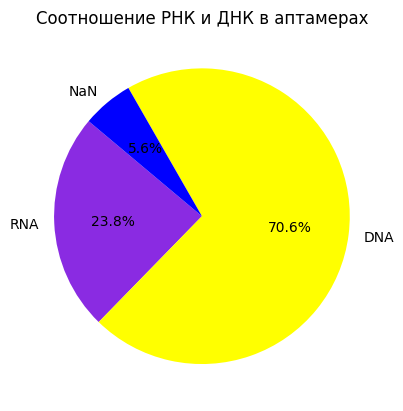

In [14]:
rna_count = df[df['RNA/DNA'] == 'RNA'].shape[0]
dna_count = df[df['RNA/DNA'] == 'DNA'].shape[0]
na_count = df[df['RNA/DNA'].isna()].shape[0]  # Исправлено для 'NaN'
# Расчет процентного соотношения
total_count = len(df)
rna_percentage = (rna_count / total_count) * 100
dna_percentage = (dna_count / total_count) * 100
na_percentage = (na_count / total_count) * 100

# Построение круговой диаграммы
labels = ['RNA', 'DNA', 'NaN']  # Добавлен 'NaN' в список меток
sizes = [rna_percentage, dna_percentage, na_percentage]  # Добавлено процентное соотношение для 'NaN'
colors = ['blueviolet', 'yellow', 'blue']  # Исправлен цвет 'green'

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Соотношение РНК и ДНК в аптамерах')
plt.show()

на данной диаграме наглядно видно соотношение ДНК и РНК последовательностей в нашем датесете, последовательностей ДНК почти в 3 раза больше.

In [5]:
dna_data = df[df['RNA/DNA'] == 'DNA']
rna_data = df[df['RNA/DNA'] == 'RNA']


longest_dna_aptamer = dna_data.loc[dna_data['aptamer_length'].idxmax()]
longest_rna_aptamer = rna_data.loc[rna_data['aptamer_length'].idxmax()]
shortest_dna_aptamer = dna_data.loc[dna_data['aptamer_length'].idxmin()]
shortest_rna_aptamer = rna_data.loc[rna_data['aptamer_length'].idxmin()]

print("Самый короткий аптамер ДНК:")
print(shortest_dna_aptamer['aptamer_sequence'])
print(f"Длина: {shortest_dna_aptamer['aptamer_length']}")

print("\nСамый короткий аптамер РНК:")
print(shortest_rna_aptamer['aptamer_sequence'])
print(f"Длина: {shortest_rna_aptamer['aptamer_length']}")

print("Самый длинный аптамер ДНК:")
print(longest_dna_aptamer['aptamer_sequence'])
print(f"Длина: {longest_dna_aptamer['aptamer_length']}")

print("\nСамый длинный аптамер РНК:")
print(longest_rna_aptamer['aptamer_sequence'])
print(f"Длина: {longest_rna_aptamer['aptamer_length']}")



Самый короткий аптамер ДНК:
TGCGGAGGAAGGT
Длина: 13.0

Самый короткий аптамер РНК:
CCGAAACUUGGCA
Длина: 13.0
Самый длинный аптамер ДНК:
GGGCCGTTCGAACACGAGCATGCCGGTGGGTGGTCAGGTGGGATAGCGTTCCGCGTATGGCCCAGCGCATCACGGGTTCGCACCAGGACAGTACTCAGGTCATCCTAGG
Длина: 109.0

Самый длинный аптамер РНК:
GGGAGAAUUCCCGCGGCGUUGGCCCAGGAUAAUAGGACGAAAUCCGAAAAAUCCGUACCCAACAUAGAACCCCCCCAGCGCUCACACGGACGCCCCAUUACGGCUAACCGAACGCCUGCAGCCCGGGAAGCUU
Длина: 133.0


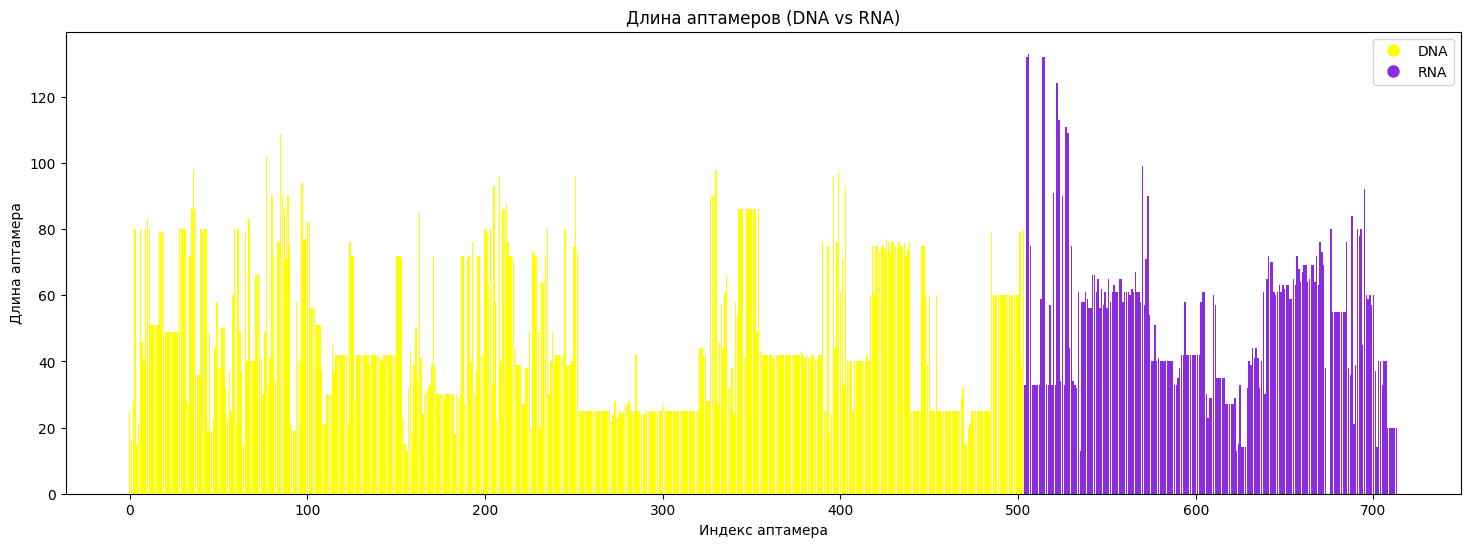

In [6]:
sorted_df = df.sort_values(by=['RNA/DNA'])
dna_data = sorted_df[sorted_df['RNA/DNA'] == 'DNA']
rna_data = sorted_df[sorted_df['RNA/DNA'] == 'RNA']

# Увеличение размера графика
plt.figure(figsize=(18, 6))

# Построение столбчатого графика
bars = plt.bar(range(len(sorted_df)), sorted_df['aptamer_length'], color=['yellow' if rna == 'DNA' else 'blueviolet' for rna in sorted_df['RNA/DNA']])

# Добавление метки цвета в верхний правый угол графика
dna_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='DNA')
rna_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blueviolet', markersize=10, label='RNA')
plt.legend(handles=[dna_patch, rna_patch], loc='upper right')

plt.xlabel('Индекс аптамера')
plt.ylabel('Длина аптамера')
plt.title('Длина аптамеров (DNA vs RNA)')
plt.show()

Данный график показывет длину каждой последовательности, для ДНК самый длинный аптамер = 109.0, для РНК = 133.0, показатели коротких аптамеров : 13.0.

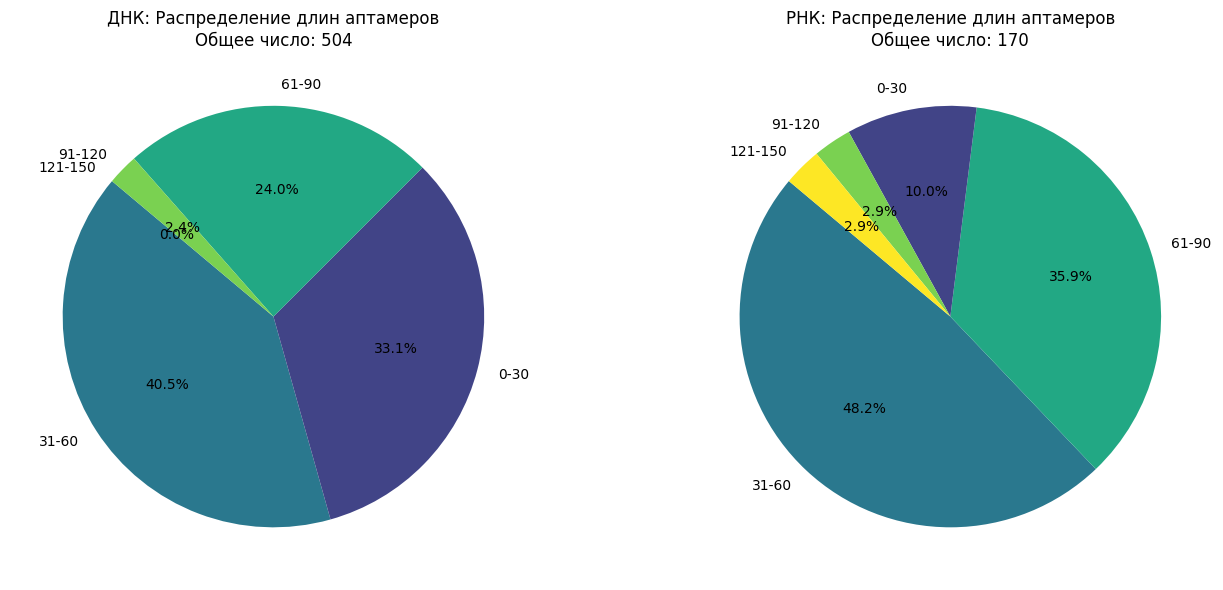

In [15]:
df['Length_Class'] = pd.cut(df['aptamer_length'], bins=[0, 30, 60, 90, 120, 150], labels=['0-30', '31-60', '61-90', '91-120', '121-150'])
def plot_pie_chart(data, title, color_mapping):
    labels = data['Length_Class'].value_counts().index
    sizes = data['Length_Class'].value_counts().values
    colors = [color_mapping[label] for label in labels]

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(title)

# Создаем уникальные цвета для каждой группы
unique_colors = plt.cm.viridis(np.linspace(0, 1, len(df['Length_Class'].unique())))
color_mapping = dict(zip(df['Length_Class'].unique(), unique_colors))

# Создание двух круговых диаграмм для ДНК и РНК
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_pie_chart(dna_data, f'ДНК: Распределение длин аптамеров\nОбщее число: {len(dna_data)}', color_mapping)

plt.subplot(1, 2, 2)
plot_pie_chart(rna_data, f'РНК: Распределение длин аптамеров\nОбщее число: {len(rna_data)}', color_mapping)

plt.tight_layout()
plt.show()

На данном графике наглядно показано распределение длин аптамеров для нашего датасета, наибольшее чило длин аптамеров попадает в диапазон от 31 до 90, это дает нам понять, что вероятнее чило для генерации будет в этом диапазоне (?)

In [16]:
sorted_df.tail()

,aptamer_sequence,RNA/DNA,aptamer_length,molecular_target_name,molecular_target_smiles,Kd_value,pH,buffer_conditions,Length_Class
675,ATTTGACCATGTCGAGGGAG,NaN,20.0,Dinophysistoxin-1,CC1CCC2(C(CCCO2)C)OC1C(C)CC(C3C(=C)C(C4C(O3)CC...,664.1,7.5,"50 mM Tris, 150 mM NaCl, 2 mM MgCl2, 0.02% Twe...",0-30
676,ATTTGACCATGTCGAGGGAG,NaN,20.0,Dinophysistoxin-2,C[C@@H]1CCCO[C@@]12CCC[C@H](O2)[C@@H](C)C[C@@H...,108.6,7.5,"50 mM Tris, 150 mM NaCl, 2 mM MgCl2, 0.02% Twe...",0-30
677,ACGCGCAGTCGCTACCACCT,NaN,20.0,Okadaic acid,C[C@@H]1CC[C@]2(CCCCO2)O[C@@H]1[C@@H](C)C[C@@H...,596.7,7.5,"50 mM Tris, 150 mM NaCl, 2 mM MgCl2, 0.02% Twe...",0-30
678,ACGCGCAGTCGCTACCACCT,NaN,20.0,Dinophysistoxin-1,CC1CCC2(C(CCCO2)C)OC1C(C)CC(C3C(=C)C(C4C(O3)CC...,664.1,7.5,"50 mM Tris, 150 mM NaCl, 2 mM MgCl2, 0.02% Twe...",0-30
679,ACGCGCAGTCGCTACCACCT,NaN,20.0,Dinophysistoxin-2,C[C@@H]1CCCO[C@@]12CCC[C@H](O2)[C@@H](C)C[C@@H...,108.6,7.5,"50 mM Tris, 150 mM NaCl, 2 mM MgCl2, 0.02% Twe...",0-30


если посмотреть на отсортированную таблицу, то у нас остались значение, которым не присвоено значение ДНК или РНК(мы их не берём в выборку, но если надо можем определить и взять )

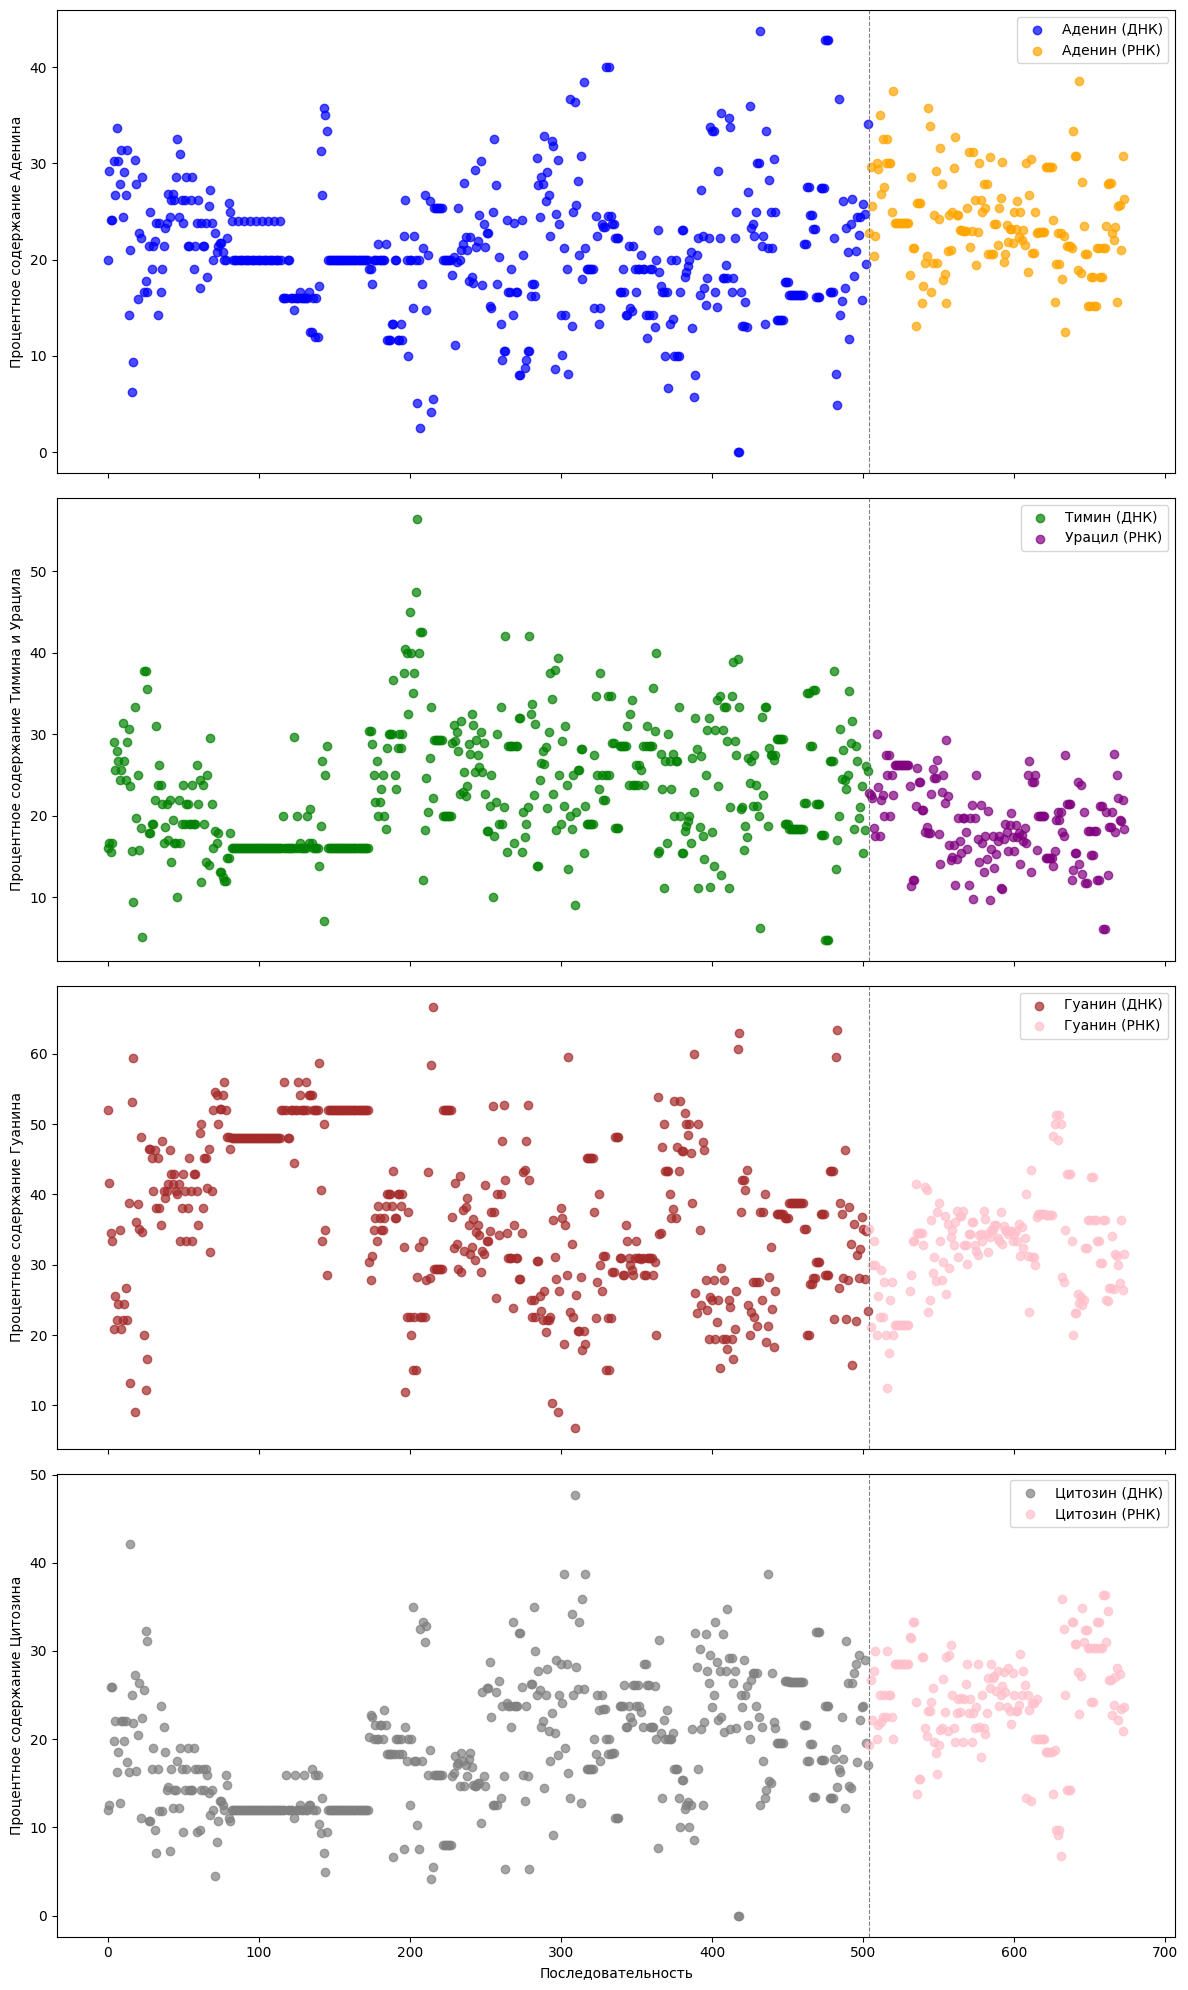

In [17]:
def calculate_nucleotide_percentage(sequence):
    total_length = len(sequence)
    a_percentage = (sequence.count('A') / total_length) * 100
    t_percentage = (sequence.count('T') / total_length) * 100
    g_percentage = (sequence.count('G') / total_length) * 100
    c_percentage = (sequence.count('C') / total_length) * 100
    u_percentage = (sequence.count('U') / total_length) * 100 if 'U' in sequence else None  # Для РНК

    return a_percentage, t_percentage, g_percentage, c_percentage, u_percentage

df[['A%', 'T%', 'G%', 'C%', 'U%']] = pd.DataFrame(df['aptamer_sequence'].apply(calculate_nucleotide_percentage).tolist(), index=df.index)


dna_data = df[df['RNA/DNA'] == 'DNA']
rna_data = df[df['RNA/DNA'] == 'RNA']

fig, axs = plt.subplots(4, 1, figsize=(12, 20), sharex=True)


axs[0].scatter(range(len(dna_data)), dna_data['A%'], label='Аденин (ДНК)', color='blue', marker='o', alpha=0.7)
axs[0].scatter(range(len(dna_data), len(dna_data) + len(rna_data)), rna_data['A%'], label='Аденин (РНК)', color='orange', marker='o', alpha=0.7)
axs[0].set_ylabel('Процентное содержание Аденина')
axs[0].legend()


axs[1].scatter(range(len(dna_data)), dna_data['T%'], label='Тимин (ДНК)', color='green', marker='o', alpha=0.7)
axs[1].scatter(range(len(dna_data), len(dna_data) + len(rna_data)), rna_data['U%'], label='Урацил (РНК)', color='purple', marker='o', alpha=0.7)
axs[1].set_ylabel('Процентное содержание Тимина и Урацила')
axs[1].legend()


axs[2].scatter(range(len(dna_data)), dna_data['G%'], label='Гуанин (ДНК)', color='brown', marker='o', alpha=0.7)
axs[2].scatter(range(len(dna_data), len(dna_data) + len(rna_data)), rna_data['G%'], label='Гуанин (РНК)', color='pink', marker='o', alpha=0.7)
axs[2].set_ylabel('Процентное содержание Гуанина')
axs[2].legend()


axs[3].scatter(range(len(dna_data)), dna_data['C%'], label='Цитозин (ДНК)', color='gray', marker='o', alpha=0.7)
axs[3].scatter(range(len(dna_data), len(dna_data) + len(rna_data)), rna_data['C%'], label='Цитозин (РНК)', color='pink', marker='o', alpha=0.7)
axs[3].set_ylabel('Процентное содержание Цитозина')
axs[3].legend()


for ax in axs:
    ax.axvline(x=len(dna_data), color='gray', linestyle='--', linewidth=0.8)


plt.xlabel('Последовательность')
plt.tight_layout()
plt.show()

на данных графиках наглядно видно распределение % содержания нуклеотидов в последовательностях

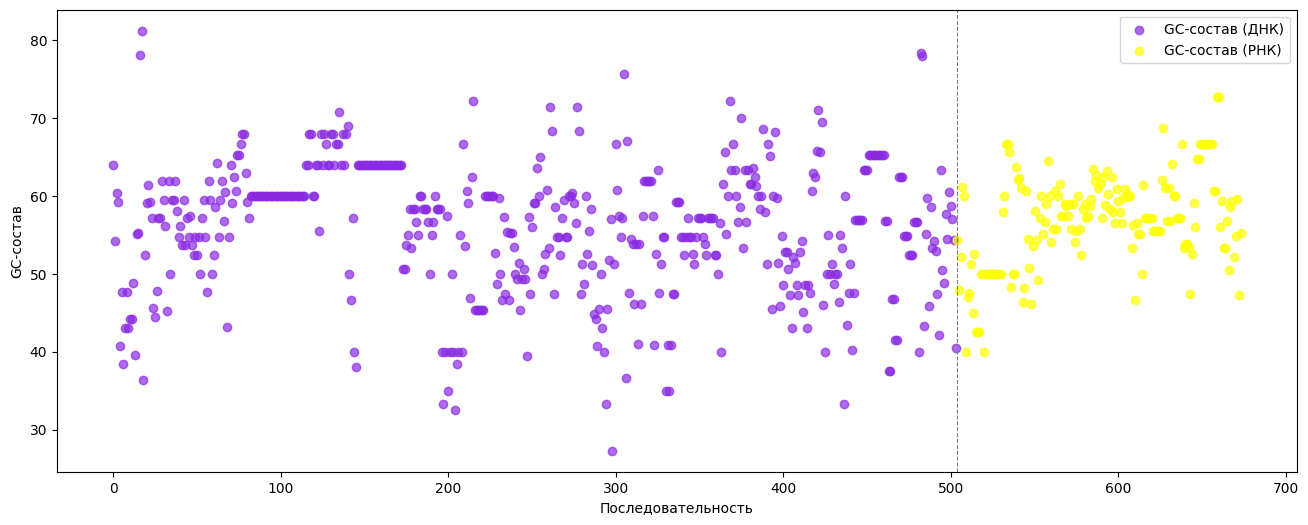

In [18]:
def calculate_gc_content(sequence):
    gc_count = sequence.count('G') + sequence.count('C')
    total_length = len(sequence)
    gc_percentage = (gc_count / total_length) * 100
    return gc_percentage

# Создаем новую колонку 'GC%'
df['GC%'] = df['aptamer_sequence'].apply(calculate_gc_content)

# Разделение данных на ДНК и РНК
dna_data = df[df['RNA/DNA'] == 'DNA']
rna_data = df[df['RNA/DNA'] == 'RNA']

# Построение графика GC-состава для каждой последовательности
plt.figure(figsize=(16, 6))
plt.scatter(range(len(dna_data)), dna_data['GC%'], color='blueviolet', marker='o', label='GC-состав (ДНК)', alpha=0.7)
plt.scatter(range(len(dna_data), len(dna_data) + len(rna_data)), rna_data['GC%'], color='yellow', marker='o', label='GC-состав (РНК)', alpha=0.7)

plt.axvline(x=len(dna_data), color='gray', linestyle='--', linewidth=0.8)



plt.xlabel('Последовательность')
plt.ylabel('GC-состав')
plt.legend()
plt.show()

на данном графике видно распределение GC состава в нашем датасете, основная часть находится в пределах от 50 до 60, что говорит о стабильности аптамерных структур

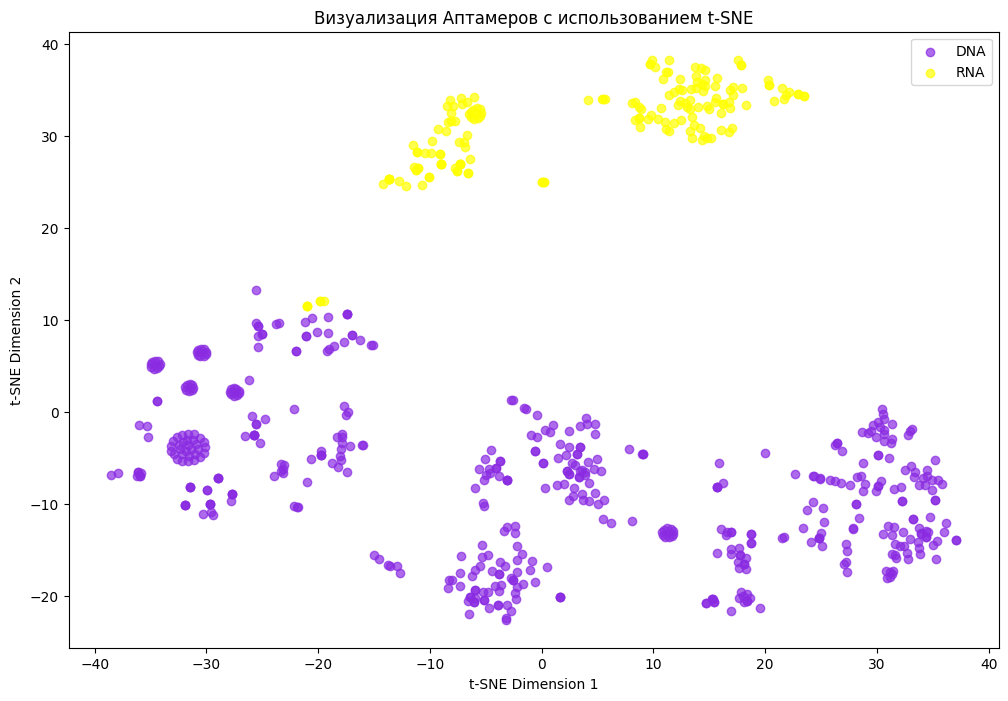

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
sequence_vectors = vectorizer.fit_transform(df['aptamer_sequence'])

# Разделение данных на ДНК и РНК
dna_data = df[df['RNA/DNA'] == 'DNA']
rna_data = df[df['RNA/DNA'] == 'RNA']

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedded_sequences = tsne.fit_transform(sequence_vectors.toarray())

# Визуализация
plt.figure(figsize=(12, 8))


plt.scatter(embedded_sequences[df['RNA/DNA'] == 'DNA'][:, 0], embedded_sequences[df['RNA/DNA'] == 'DNA'][:, 1], label='DNA', color='blueviolet', alpha=0.7)
plt.scatter(embedded_sequences[df['RNA/DNA'] == 'RNA'][:, 0], embedded_sequences[df['RNA/DNA'] == 'RNA'][:, 1], label='RNA', color='yellow', alpha=0.7)

plt.title('Визуализация Аптамеров с использованием t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

для нашего датасета с данными аптамеров На графике t-SNE, каждая точка представляет собой аптамер, а расстояние между точками отражает их сходство в высокоразмерном пространстве. Важно понимать, что расстояния между точками в пространстве t-SNE не сохраняют абсолютное сходство, а лишь сохраняют относительное сходство. То есть, близкие точки в t-SNE-пространстве имеют более высокую вероятность быть схожими, но величина расстояния не имеет прямого физического значения. на данном графике мы видим, что аптамеры образуют группы/скопления, некоторые даже находятся очень близко друг к другу, отсутствуют совсем изолированные аптамеры, значит мы можем сделать вывод об их схожести, также можем наблюдать, что ДНК и РНК аптамеры обособлены друг от друга.

График отражающий общую схожесть между нашими последовательностями ДНК и аптамерами, последовательности ДНК представлены синим цветом, РНК аптамеры красным, а ДНК аптамеры оранжевым, На графике видно что эти два класса заметно разнятся и только единичные аптамерные последовательности попадают в область значений днк, соответственно такие последовательности и, следовательно, точность предсказания будет маленькой, так же будет и с единичными ДНК последовательностями, которые попадают к аптамерам. Стоит отметить, что некоторые образцы ДНК выходят за пределы своего кластера, и очень далеки от образцов аптамеров, поэтому могут быть предсказаны с помощью модели с большей точностью. Однако важно - расстояния между точками относительны, и показанные по осям x и y, не имеют прямой интерпретации. Еще интересным наблюдением является то, что на графике днк и рнк последовательности аптамеров не сильно различаются между собой, что дает нам возможность предполагать, что РНК последовательности так же могут быть сгенерированы и относиться к аптамерным.


In [24]:
uploaded = files.upload()

for filename in uploaded.keys():
    print(f'Файл {filename} успешно загружен. Размер файла: {len(uploaded[filename])} байт.')

Saving str.xlsx to str (1).xlsx
Файл str (1).xlsx успешно загружен. Размер файла: 110922 байт.


In [25]:
df = pd.read_excel('str.xlsx')
df = df.dropna ()
df['Seq Type'].unique()

array(['DNA', 'Aptamer', 'AptamerR'], dtype=object)

<Figure size 2500x2500 with 0 Axes>

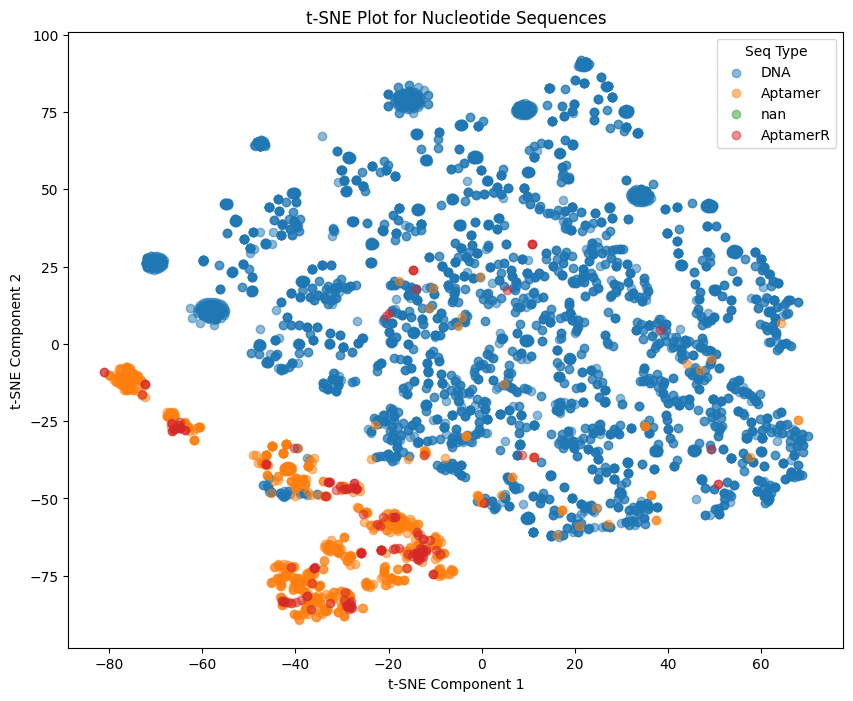

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
metrics = ["Seq"]
for metric in metrics:
    plt.figure(figsize=(25, 25))
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
X = vectorizer.fit_transform(df['Seq'])

# Применение t-SNE с параметром init="random"
tsne = TSNE(n_components=2, random_state=42, init="random")
X_tsne = tsne.fit_transform(X)

# Создание DataFrame для удобства
tsne_df = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
tsne_df['Seq Type'] = df['Seq Type']

# Сопоставление числовых значений цветам для каждого типа последовательности
color_mapping = {'DNA': 0, 'Aptamer': 1, 'AptamerR': 2}
tsne_df['Color'] = tsne_df['Seq Type'].map(color_mapping)

# Построение графика с цветовой разметкой по типу последовательности
plt.figure(figsize=(10, 8))

# Перебираем типы последовательностей и добавляем их на график
for seq_type in tsne_df['Seq Type'].unique():
    subset = tsne_df[tsne_df['Seq Type'] == seq_type]
    plt.scatter(subset['tsne1'], subset['tsne2'], label=seq_type, alpha=0.5)

plt.legend(title='Seq Type', loc='upper right')

plt.title('t-SNE Plot for Nucleotide Sequences')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()